### Bike rental prediction using Neural Networks
Bike Share data: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In this project, I will train a regression neural network to predict the amount of bike rentals each hour. <br>
Then, try different network architectures to pick the best one.


In [1]:
#general stuff
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
%matplotlib inline
#models will be used
import keras
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
hr_df = pd.read_csv('/Users/kienguyen/Documents/DATA SCIENCE/Bike-Sharing-Dataset/hour.csv', index_col='instant')

In [4]:
hr_df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [6]:
hr_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


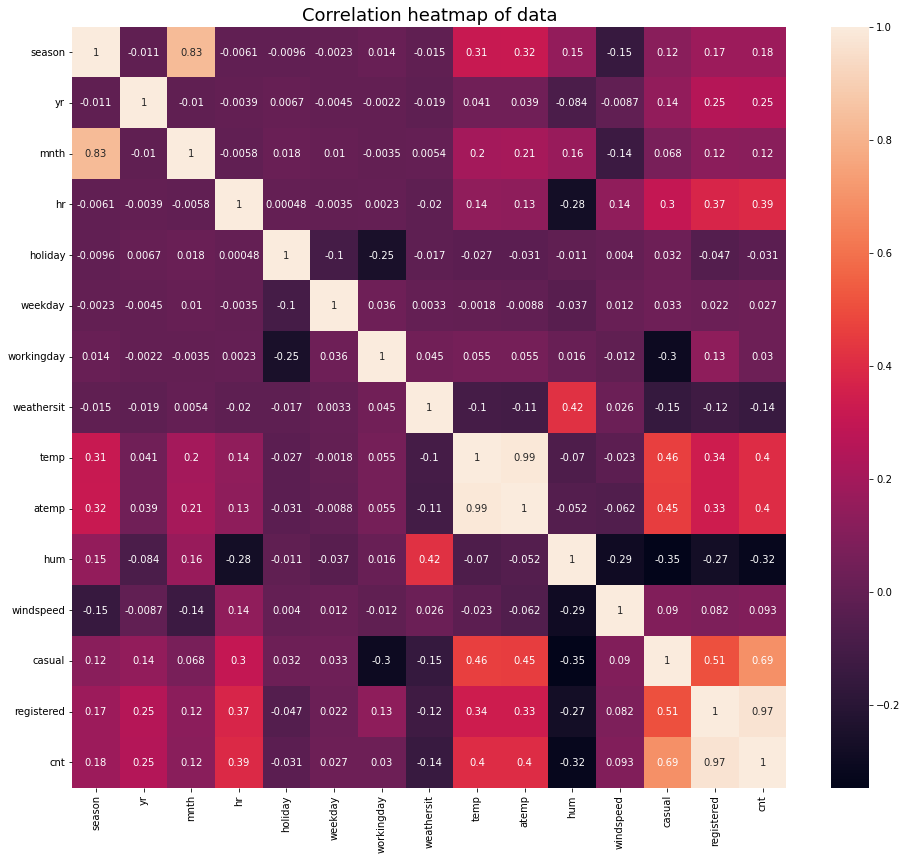

In [7]:
corr_matrix = hr_df.corr()
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True)
ax.set_title('Correlation heatmap of data', fontsize = 18)
plt.show()

According to the correlation heatmap, we can see that 'hum','temp','hr' are feaures having strong correlation with the target variable 'cnt'.

In [8]:
# Drop 'dteday' column since it is not a numerical feature that contribute to the prediction
predict_df = hr_df.drop('dteday',axis=1)
predict_df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [9]:
predict_df.shape

(17379, 15)

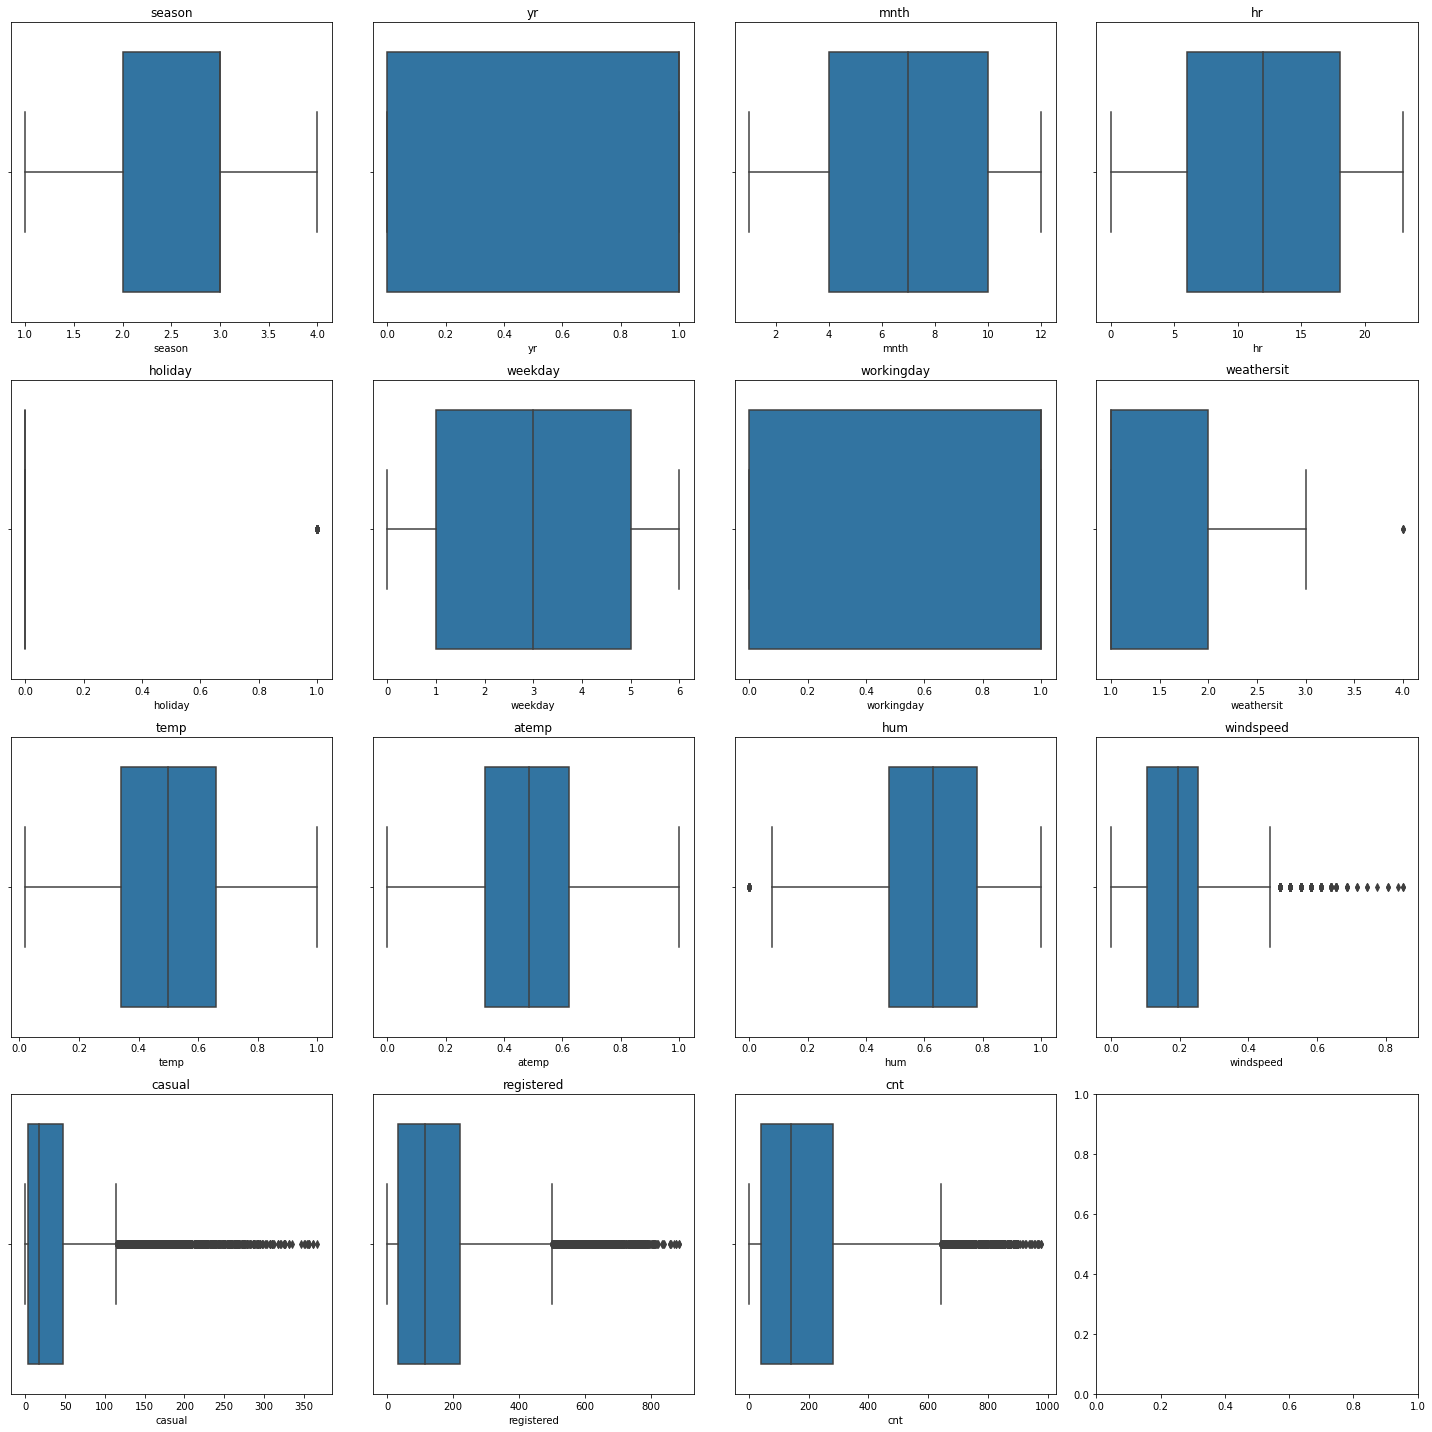

In [53]:
#Check outlier by boxplot
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.ravel()
for i, column in enumerate(predict_df.columns):
    sns.boxplot(predict_df[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

In [54]:
outlier_cols = predict_df.drop(['casual','registered','cnt'],axis=1).columns
for i in outlier_cols:
    q3 = predict_df[i].quantile(0.75)  
    q1 = predict_df[i].quantile(0.25)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    upper_limit = q3 + (IQR * 1.5)
    predict_df=predict_df[~((predict_df[i]<(q1-1.5*IQR)) | (predict_df[i]>(q3+1.5*IQR)))]

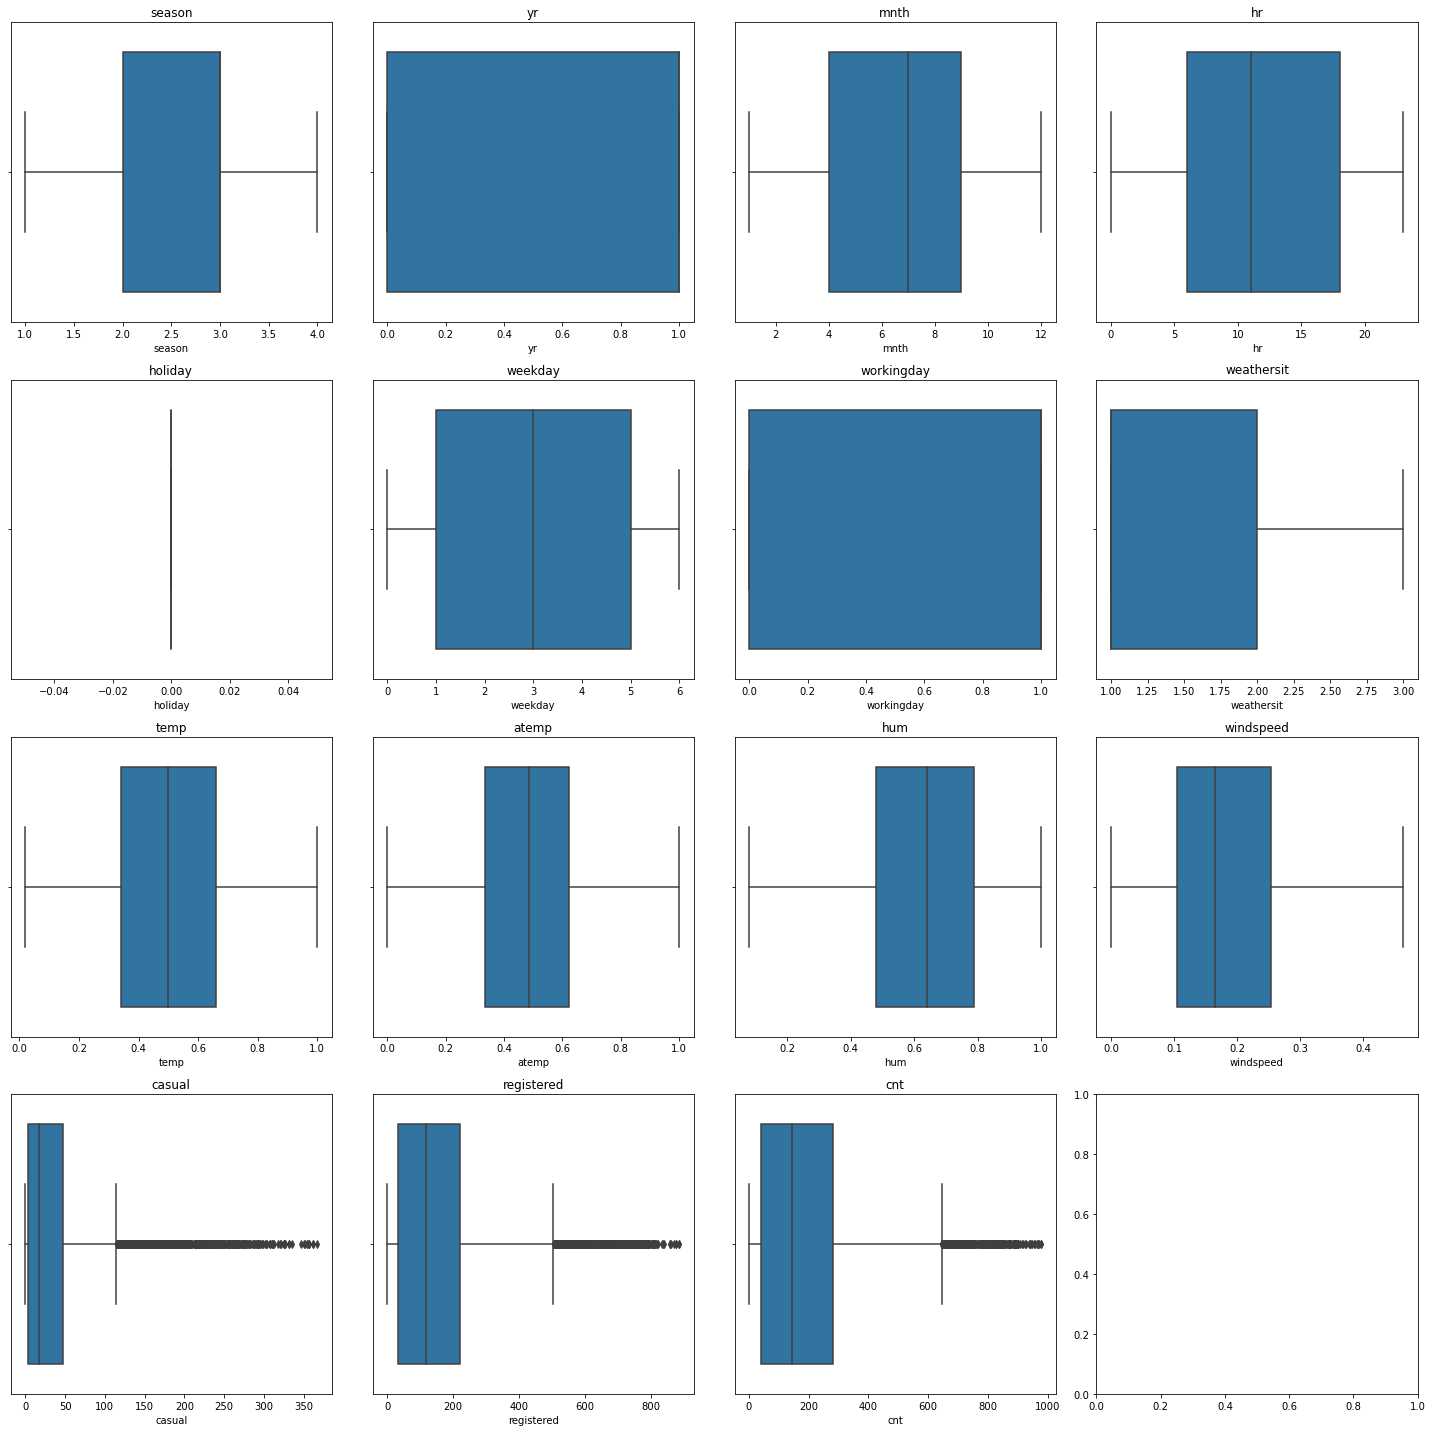

In [55]:
#Check outlier again
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.ravel()
for i, column in enumerate(predict_df.columns):
    sns.boxplot(predict_df[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

#### Prepare data and fit to Neural Network

In [56]:
#gather up names of all the columns
cols = predict_df.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'cnt'
feature_cols = [c for c in cols if c != prediction_col]

x = predict_df[feature_cols]
y = predict_df[prediction_col]

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [57]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

The target variable is numerical hence I will train a Regressor Neural Network to predict the amount of rental bike.

In [58]:
from sklearn.neural_network import MLPRegressor  

mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(x_train, y_train.values.ravel())  

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [59]:
# make predictions
predictions = mlp.predict(x_test)
print(predictions)

[118.8750679   87.80241547 461.94262125 ...  18.15373604 563.61430401
 106.89561526]


In [60]:
print('MSE =',mean_squared_error(y_test,predictions))
print('R2 =',r2_score(y_test,predictions))

MSE = 0.023236551205400857
R2 = 0.9999993184777332


The above scores seem good. However, this data includes 'casual' and 'registered' features, these are considered as target prediction also, because the 'cnt' is the sum of these 2 variables. Hence, I will remove these features in the dependent variable list and fit the network again.

#### Remove 'casual', 'registered' columns since these 2 columns are also target variables

In [140]:
predict_df2=predict_df.drop(['registered','casual'], axis=1)
predict_df2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90


In [141]:
#gather up names of all the columns
cols2 = predict_df2.columns

#set the prediction column and the feature columns for KNN
prediction_col2 = 'cnt'
feature_cols2 = [c for c in cols2 if c != prediction_col2]

x2 = predict_df2[feature_cols2]
y2 = predict_df2[prediction_col2]

#split the dataset into the train and test data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=41)

In [142]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train2)

x_train2 = scaler.transform(x_train2)  
x_test2 = scaler.transform(x_test2)  

In [143]:
mlp2 = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp2.fit(x_train2, y_train2.values.ravel())  

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [144]:
predictions2 = mlp2.predict(x_test2)
print(predictions2)

[183.29987993 107.72115916 453.33282114 ...  37.54240663 445.59267396
 133.60521421]


In [145]:
print('MSE =',mean_squared_error(y_test2,predictions2))
print('R2 =',r2_score(y_test2,predictions2))

MSE = 3206.4589451403053
R2 = 0.9059553567381883


Well, the R2 score is still good but the MSE is now too big, this means that the model doesn't fit well with the data. Next, I will try with different parameters to try other networks with different architectures.

### Try with different architectures

In [148]:
# First try: increase units of hidden layers:
mlp3 = MLPRegressor(hidden_layer_sizes=(20,20,20), max_iter=1000)  
mlp3.fit(x_train2, y_train2.values.ravel())  
predictions3 = mlp3.predict(x_test2)
print(predictions3)
print('MSE =',mean_squared_error(y_test2,predictions3))
print('R2 =',r2_score(y_test2,predictions3))

[185.06816379 106.28625029 473.90908196 ...   2.67816829 529.15967849
 155.45342566]
MSE = 2218.2589770765444
R2 = 0.9349390159890706


Hmm, it's much worse

In [149]:
# Second try: increase units of hidden layers. I still work with 'relu' activation function
mlp4 = MLPRegressor(hidden_layer_sizes=(30,30,30), max_iter=1000)  
mlp4.fit(x_train2, y_train2.values.ravel())  
predictions4 = mlp4.predict(x_test2)
print(predictions4)
print('MSE =',mean_squared_error(y_test2,predictions4))
print('R2 =',r2_score(y_test2,predictions4))

[157.97521474 115.73364736 387.26921324 ...  27.0252899  524.91108566
 145.13301324]
MSE = 2044.2330064220491
R2 = 0.9400431544198142


The scores are improved, let's try more

In [150]:
# Third try: keep the hidden layers and more interations. 
mlp5 = MLPRegressor(hidden_layer_sizes=(30,30,30), max_iter=1500)  
mlp5.fit(x_train2, y_train2.values.ravel())  
predictions5 = mlp5.predict(x_test2)
print(predictions5)
print('MSE =',mean_squared_error(y_test2,predictions5))
print('R2 =',r2_score(y_test2,predictions5))

[185.60399724 134.57276733 430.44319523 ...   7.55742872 520.27825939
 134.67065589]
MSE = 2019.753021392394
R2 = 0.9407611462913951


The scores are not really different when increase the iterations, I will try a bit more with the number of hidden layers

In [151]:
# Fourth try: keep interations, increase the layers 
mlp6 = MLPRegressor(hidden_layer_sizes=(30,30,30,30), max_iter=1500)  
mlp6.fit(x_train2, y_train2.values.ravel())  
predictions6 = mlp6.predict(x_test2)
print(predictions6)
print('MSE =',mean_squared_error(y_test2,predictions6))
print('R2 =',r2_score(y_test2,predictions6))

[187.39107268 108.91939934 413.30891616 ...   7.58280411 535.9893799
 113.46689674]
MSE = 1902.9802918698365
R2 = 0.9441860614013488


In [152]:
# Fifth try: keep interations, increase the layers 
mlp7 = MLPRegressor(hidden_layer_sizes=(50,50,50,50), max_iter=1500)  
mlp7.fit(x_train2, y_train2.values.ravel())  
predictions7 = mlp7.predict(x_test2)
print(predictions7)
print('MSE =',mean_squared_error(y_test2,predictions7))
print('R2 =',r2_score(y_test2,predictions7))

[162.99429746 158.52047507 435.27806357 ...   9.55043522 515.1411378
 137.17152198]
MSE = 1768.2858823201868
R2 = 0.948136614928521


In [154]:
# Sixth try: different numbers of unit
mlp8 = MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=1500)  
mlp8.fit(x_train2, y_train2.values.ravel())  
predictions8 = mlp8.predict(x_test2)
print(predictions8)
print('MSE =',mean_squared_error(y_test2,predictions8))
print('R2 =',r2_score(y_test2,predictions8))

[178.69353511 115.88814301 456.81627523 ...  18.90143715 547.60662093
 119.19457477]
MSE = 1987.5674284707454
R2 = 0.9417051417256962


Keeping increasing the unit of each layers equally seems not effective. Let's try different number of units differently between layers.

In [165]:
# 7th try: increase layers
mlp9 = MLPRegressor(hidden_layer_sizes=(100,50,30,20), max_iter=1500)  
mlp9.fit(x_train2, y_train2.values.ravel())  
predictions9 = mlp9.predict(x_test2)
print(predictions9)
print('MSE =',mean_squared_error(y_test2,predictions9))
print('R2 =',r2_score(y_test2,predictions9))

[169.30283512 139.33236002 357.42472675 ...  19.82487667 553.22527246
 146.27631305]
MSE = 1792.7369596065978
R2 = 0.9474194709138588


In [ ]:
# 7th try: increase layers
mlp9 = MLPRegressor(hidden_layer_sizes=(100,50,30,20), max_iter=1500)  
mlp9.fit(x_train2, y_train2.values.ravel())  
predictions9 = mlp9.predict(x_test2)
print(predictions9)
print('MSE =',mean_squared_error(y_test2,predictions9))
print('R2 =',r2_score(y_test2,predictions9))

It seems that the scores are no longer improved if I try different architectures with different value of hidden_layer_sizes and max_iter. Now, I will try to find the best parameters with GridSearch

#### Run GridSearchCV to find the best parameters

In [159]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes':[(50,50,50,50)],'solver':['sgd','adam'],'learning_rate':['constant','invscaling','adaptive'],'max_iter':[1500], 'activation': ['identity','logistic', 'tanh', 'relu']}
gcv = GridSearchCV(estimator = mlp2, param_grid = params)
gcv.fit(x_train2,y_train2)

GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(10, 10, 10),
                                    max_iter=1000),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50, 50)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [1500], 'solver': ['sgd', 'adam']})

In [160]:
model = gcv.best_estimator_
model.fit(x_train2,y_train2)
y_train_pred = model.predict(x_train2)
y_test_pred = model.predict(x_test2)
print('MSE =',mean_squared_error(y_test2,y_test_pred))
print('R2 =',r2_score(y_test2,y_test_pred))

MSE = 1815.2362024941979
R2 = 0.9467595737165995


In [161]:
model.get_params()


{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 50, 50, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [164]:
mlp7.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 50, 50, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Summary:
* After trying different architectures for the model, and even run a GridSearchCV to find best parameters but it seems the performance of the model selected by GridSearch is still not the best. 
* Have a quick look we can see that the model 'mlp7' in the fifth try having the best performance with MSE = 1768.3 and R2 = 0.95. Hence, I will choose this as the model for the network to predict bike rental number.
* Moreover, comparing 'mlp7' and 'model' chosen by GridSearch, we can see that the activation function 'relu' perform better than 'tanh' with this dataset since other parameters of these 2 models are the same but the activation function.